# **Creating a WordCloud Using Olist Dataset Comments**

In [1]:
!pip install wordcloud # We are installing it because the library is not available.

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


In [2]:
import pandas as pd               # Imported for data frames.
from nltk.corpus import stopwords # Imported to remove stop words. (1)
from wordcloud import WordCloud   # Imported to create word clouds.
import matplotlib.pyplot as plt   # Used for visualization.
import re                         # Imported to handle and remove irregular or unwanted expressions.
import nltk                       
nltk.download('stopwords')        # Downloading stopwords for removal. (2)
from PIL import Image             # Imported to add a mask image to the word cloud.
import numpy as np                # Imported to create numpy arrays.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("olist_order_reviews_dataset.csv") # We are putting the data into a pandas DataFrame.

In [4]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [5]:
df = df.drop(columns = ["review_id", "order_id", "review_comment_title", 
                        "review_creation_date", "review_answer_timestamp", "review_score"])
# We can remove the columns except for the one containing the comments, as we don't need the other columns.

In [6]:
df

,review_comment_message
0,NaN
1,NaN
2,NaN
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
...,...
99219,NaN
99220,NaN
99221,"Excelente mochila, entrega super rápida. Super..."
99222,NaN


In [7]:
df.isnull().sum()

# There are 58,247 empty comments in the dataset, which might indicate that no comments were made 
# for some products or inappropriate comments were not added. Therefore, it may be appropriate to remove these empty values.

review_comment_message    58247
dtype: int64

In [8]:
df = df.dropna()

# We have removed all null expressions.

In [9]:
df

,review_comment_message
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
9,aparelho eficiente. no site a marca do aparelh...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,"Vendedor confiável, produto ok e entrega antes..."
...,...
99205,para este produto recebi de acordo com a compr...
99208,Entregou dentro do prazo. O produto chegou em ...
99215,"O produto não foi enviado com NF, não existe v..."
99221,"Excelente mochila, entrega super rápida. Super..."


In [10]:
df.isnull().sum()

# The dataset containing the comments is now prepared.

review_comment_message    0
dtype: int64

In [11]:
stopwords = set(stopwords.words('portuguese'))


# We need to identify and parse words in Portuguese that do not have a meaningful standalone meaning. 
# Failure to do so may lead to incorrect output.

In [12]:
stopwords

# We have extracted the Portuguese stop words from this dictionary.

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [13]:
text = " ".join(review for review in df['review_comment_message'])

# We are combining all comment lines into a single text. Within this text, we will search for the most frequent expressions. 
# However, there are unwanted expressions in the comment text, such as emojis, which also need to be parsed.

In [14]:
text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)

# With this command line, we have also removed unwanted expressions.

In [15]:
text = " ".join(word for word in text.split() if word not in stopwords)

# We are also removing the expressions from the text that are listed in the stop words dictionary.

In [ ]:
# I did not call the text file because its length is significant, and due to uploading it to GitHub, the file cannot be viewed.

In [16]:
wordcloud = WordCloud(background_color="black").generate(text)


# We are processing the text created as a black background. Inside WordCloud, if we include 'stopwords = stopwords', 
# we can also exclude the stop words we defined earlier as parameters.

In [17]:
wordcloud

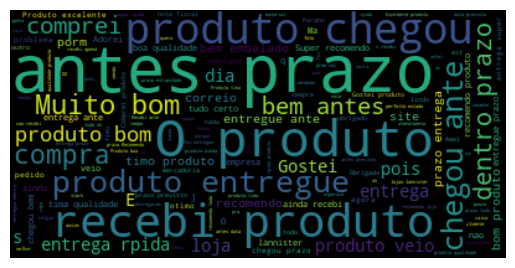

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# The output of a classic word cloud is as follows, but since we are working with comment data, 
# we want to mask it with a background image.

In [19]:
mask = np.array(Image.open("mask_image.png"))

# This PNG is in the shape of a comment cloud, and we will use this image for masking.

In [20]:
wordcloud = WordCloud(background_color="black", mask=mask).generate(text)

# With the 'mask' parameter, we can visualize the words as if they were inside a speech bubble.

In [21]:
wordcloud

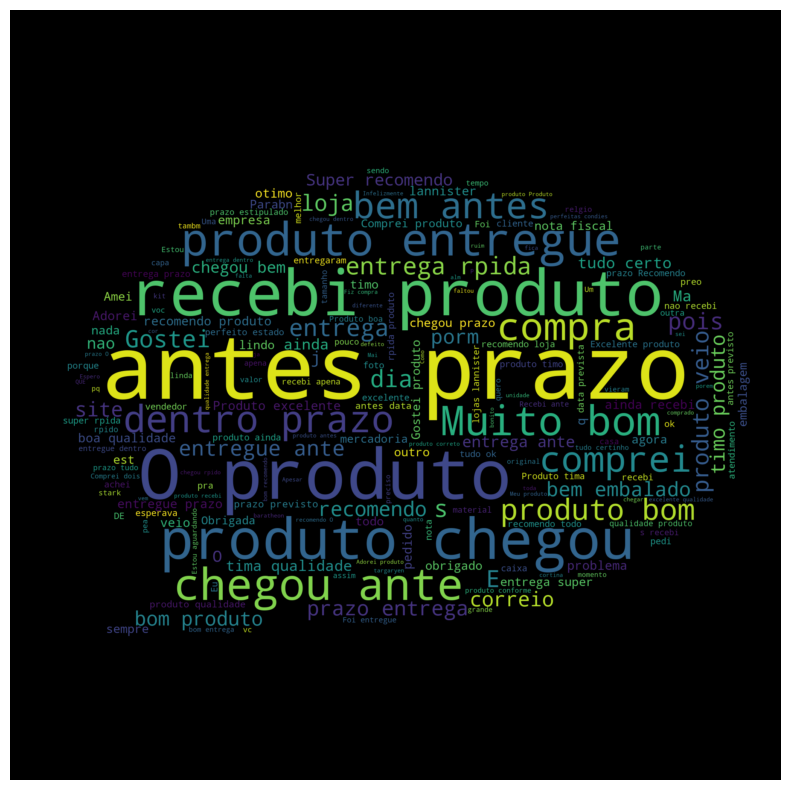

In [22]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear') # Here, the image is drawn, and the image is displayed in a 'bilinear' manner
                                                # which is smoother.
plt.axis("off")                                 # I added it to remove the axis values.
plt.show()